In [ ]:
# library
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
# loading dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 5 -> [0,0,0,0,0,1,0,0,0,0]

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
# Build the model
model = Sequential([
    Conv2D(8,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(),
    Flatten(),
    Dense(10,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Training the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy','mse'])
model.fit(x_train,y_train,epochs=10)
# 60000/32 = 1875 (default batch = 32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8427 - loss: 3.6200 - mse: 0.0294
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9606 - loss: 0.1722 - mse: 0.0064
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9713 - loss: 0.0993 - mse: 0.0045
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9767 - loss: 0.0760 - mse: 0.0036
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9777 - loss: 0.0678 - mse: 0.0034
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9811 - loss: 0.0618 - mse: 0.0029
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9819 - loss: 0.0556 - mse: 0.0027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9831 - loss: 0.0533 - mse: 0.0026
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9836 - loss: 0.0490 - mse: 0.0024
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.986

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


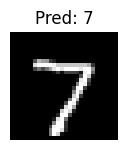

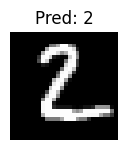

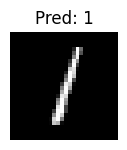

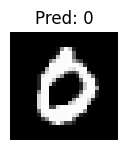

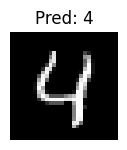

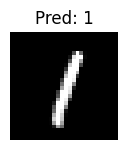

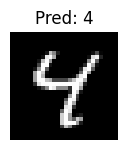

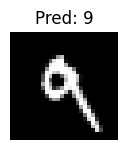

In [ ]:
# Visuals
import matplotlib.pyplot as plt
preds = model.predict(x_test[:8])
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_test[i],cmap='gray')
    plt.title(f'Pred: {preds[i].argmax()}')
    plt.axis('off')
    plt.show()
